MIE 1624: A1 - Due: 2023-02-12
- William Hazen
- Student ID: 1009231225

In [2]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import f_oneway, probplot
import seaborn as sns
!pip install pingouin
import pingouin as pg

# Questions: 
- The  objective  of  this  assignment  is  to  explore  the  survey  data  to  understand  (1)  the nature of women’s representation in Data Science and Machine Learning and (2) the effects of education on income level. The following tasks should be completed: 

### 1. [3pts] Perform exploratory data analysis to analyze the survey dataset and to summarize its main characteristics.  
*Present  3  graphical  figures  that  represent  different  trends  in  the  data.  For  your explanatory data analysis, you can consider Country, Age, Education, Professional Experience, and Salary.*


In [1]:
clean_kd = pd.read_csv("clean_kaggle_data.csv")
kaggle_survey_2021_responses = pd.read_csv("kaggle_survey_2021_responses.csv")


NameError: name 'pd' is not defined

In [101]:
clean_kd["Time from Start to Finish (seconds)"].sort_values(ascending=True)

9540         121
3441         123
10676        124
10267        128
7294         128
          ...   
6847     2085418
8257     2210790
11938    2223205
1917     2414534
3696     2488653
Name: Time from Start to Finish (seconds), Length: 15391, dtype: int64

In [102]:
clean_kd.columns

Index(['Unnamed: 0', 'Time from Start to Finish (seconds)', 'Q1', 'Q2', 'Q3',
       'Q4', 'Q5', 'Q6', 'Q7_Part_1', 'Q7_Part_2',
       ...
       'Q38_B_Part_3', 'Q38_B_Part_4', 'Q38_B_Part_5', 'Q38_B_Part_6',
       'Q38_B_Part_7', 'Q38_B_Part_8', 'Q38_B_Part_9', 'Q38_B_Part_10',
       'Q38_B_Part_11', 'Q38_B_OTHER'],
      dtype='object', length=370)

In [103]:
clean_kd.nunique()

Unnamed: 0                             15391
Time from Start to Finish (seconds)     3378
Q1                                        11
Q2                                         5
Q3                                        66
                                       ...  
Q38_B_Part_8                               1
Q38_B_Part_9                               1
Q38_B_Part_10                              1
Q38_B_Part_11                              1
Q38_B_OTHER                                1
Length: 370, dtype: int64

In [104]:
clean_kd.iloc[0]

Unnamed: 0                                 1
Time from Start to Finish (seconds)      910
Q1                                     50-54
Q2                                       Man
Q3                                     India
                                       ...  
Q38_B_Part_8                             NaN
Q38_B_Part_9                             NaN
Q38_B_Part_10                            NaN
Q38_B_Part_11                            NaN
Q38_B_OTHER                              NaN
Name: 0, Length: 370, dtype: object

In [105]:
Kaggle_Questions = {}
for name in kaggle_survey_2021_responses.columns:
    Kaggle_Questions[name] = kaggle_survey_2021_responses[name][0]

c = 0
for key, value in Kaggle_Questions.items():
    if c == 10:
        break
    print(key, value)
    c += 1

Time from Start to Finish (seconds) Duration (in seconds)
Q1 What is your age (# years)?
Q2 What is your gender? - Selected Choice
Q3 In which country do you currently reside?
Q4 What is the highest level of formal education that you have attained or plan to attain within the next 2 years?
Q5 Select the title most similar to your current role (or most recent title if retired): - Selected Choice
Q6 For how many years have you been writing code and/or programming?
Q7_Part_1 What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python
Q7_Part_2 What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R
Q7_Part_3 What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - SQL


In [106]:
for key, value in Kaggle_Questions.items():
    if "compensation" in value:
        print(key)
        

Q25


In [107]:
Kaggle_Questions['Q25']

'What is your current yearly compensation (approximate $USD)?'

- Age [Q1]
- Gender [Q2] 
- Country [Q3]
- Education [Q4] 
- Professional Experience [Q5]
- Salary [Q25]

In [108]:
Age_KS = clean_kd['Q1']
Gender_KS = clean_kd['Q2']
Country_KS = clean_kd['Q3']
Education_KS = clean_kd['Q4']
Experience_KS = clean_kd['Q5']
Years_of_Experience_KS = clean_kd['Q6']
Salary_KS = clean_kd['Q25']

#### 3 Graphical Figure

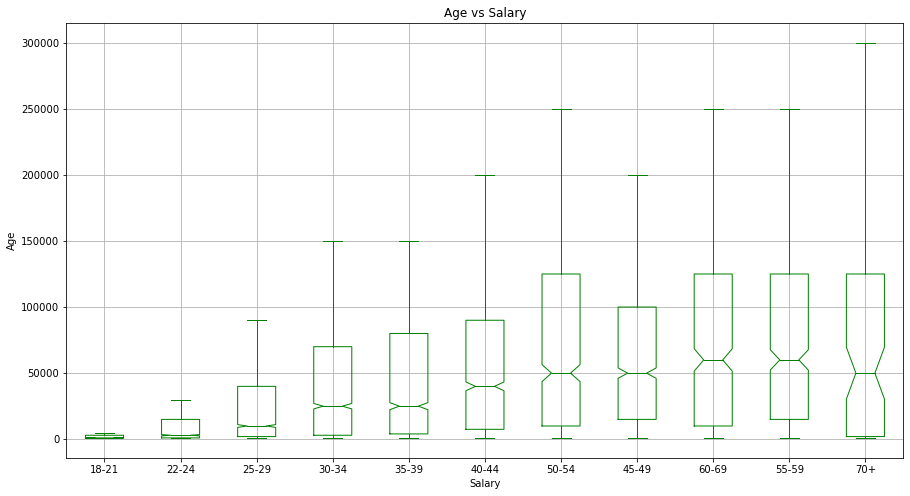

In [109]:
temp = pd.DataFrame({col: vals['Q25'] for col, vals in clean_kd.groupby(by='Q1')})
indx = temp.mean().sort_values()
temp[indx.index].boxplot(vert=True, return_type='axes', notch=True, showfliers=False, color='green', grid=True, figsize=(15, 8))
# Sourced how to do mean sorted boxplot from: https://medium.com/the-barometer/note-to-self-pandas-sort-boxplots-by-median-2a6c70c11644
plt.title("Age vs Salary")
plt.ylabel('Age')
plt.xlabel('Salary')
plt.show()

In [110]:
clean_kd[['Q1', 'Q25']].groupby('Q1').describe().sort_values(by=("Q25", "mean"), ascending=False)


Q25                                                          \
        count           mean            std     min      25%      50%   
Q1                                                                      
70+      97.0  100469.072165  161287.153576  1000.0   2000.0  50000.0   
55-59   504.0   97216.269841  140218.945713  1000.0  15000.0  60000.0   
60-69   454.0   87435.022026  103111.079789  1000.0  10000.0  60000.0   
45-49  1141.0   82403.593339  121998.820440  1000.0  15000.0  50000.0   
50-54   791.0   82304.677623  112676.455554  1000.0  10000.0  50000.0   
40-44  1528.0   67760.798429  109596.664315  1000.0   7500.0  40000.0   
35-39  1992.0   59316.265060  103367.663264  1000.0   4000.0  25000.0   
30-34  2626.0   47932.025895   84957.880022  1000.0   3000.0  25000.0   
25-29  3235.0   29213.910355   68629.908266  1000.0   2000.0  10000.0   
22-24  2092.0   19918.738050   81903.864589  1000.0   1000.0   3000.0   
18-21   931.0   15722.878625   86677.395961  1000.0   1000.0   1000.0   

                            
            75%        max  
Q1                          
70+    125000.0  1000000.0  
55-59  125000.0  1000000.0  
60-69  125000.0  1000000.0  
45-49  100000.0  1000000.0  
50-54  125000.0  1000000.0  
40-44   90000.0  1000000.0  
35-39   80000.0  1000000.0  
30-34   70000.0  1000000.0  
25-29   40000.0  1000000.0  
22-24   15000.0  1000000.0  
18-21    3000.0  1000000.0

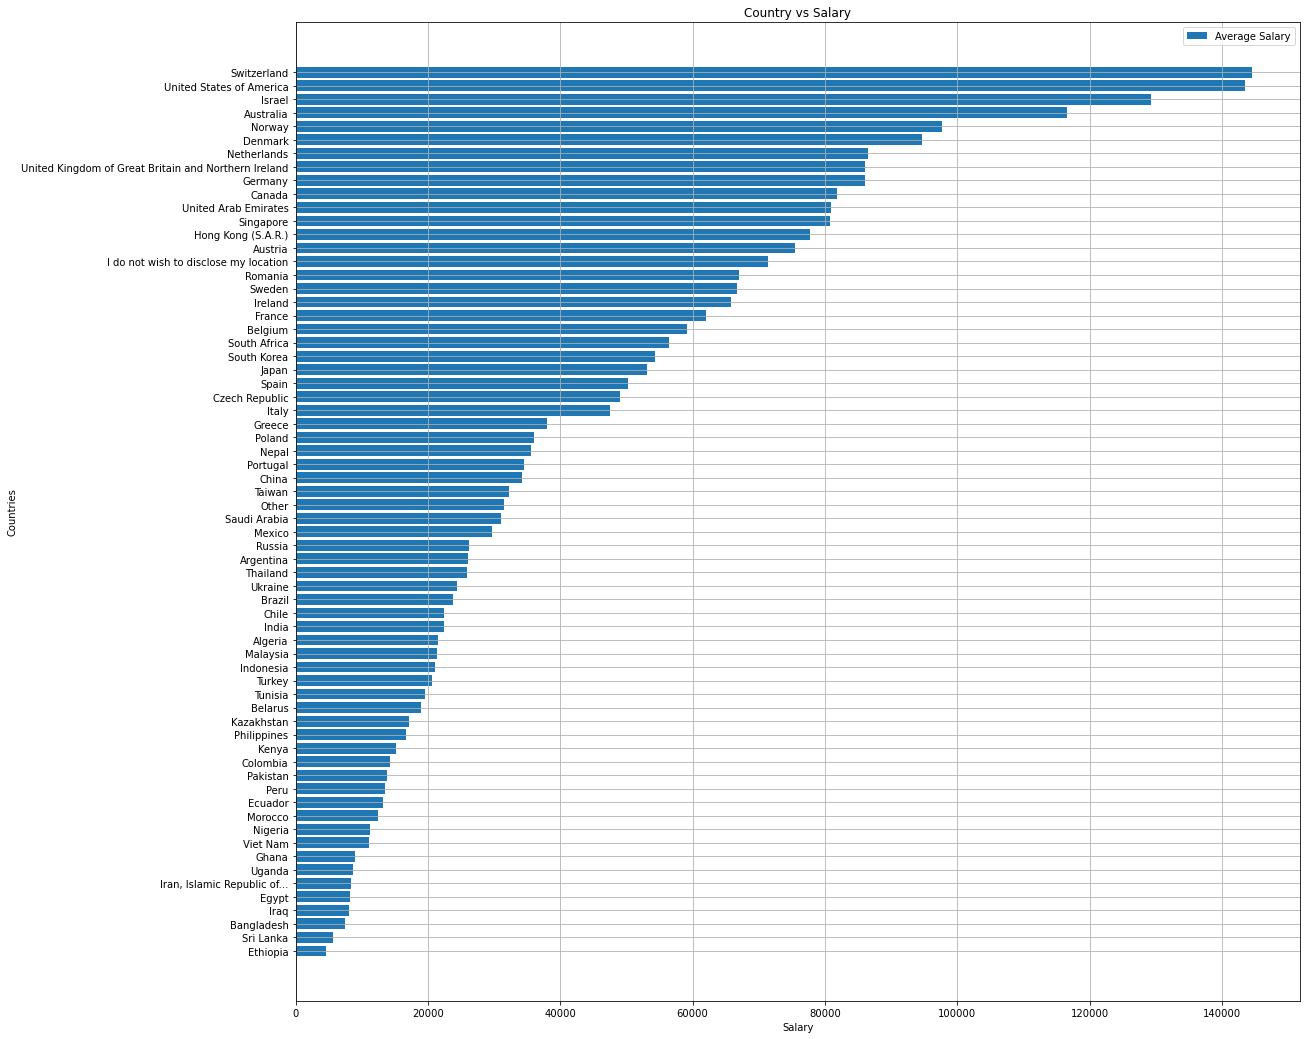

In [111]:
country_salary_mean = clean_kd[['Q3', 'Q25']].groupby('Q3').describe().iloc[:, 1].sort_values(ascending=True)
plt.figure(figsize=(18, 18))
plt.barh(country_salary_mean.index, country_salary_mean)
plt.grid()
plt.title("Country vs Salary")
plt.ylabel("Countries")
plt.xlabel("Salary")
plt.legend(['Average Salary'])
plt.show()

In [112]:
clean_kd[['Q3', 'Q25']].groupby('Q3').describe().sort_values(
    by=("Q25", "mean"), ascending=False)


Q25                                        \
                           count           mean            std     min   
Q3                                                                       
Switzerland                 52.0  144548.076923  142394.345408  1000.0   
United States of America  1845.0  143463.685637  151989.614018  1000.0   
Israel                      96.0  129322.916667  180981.766735  1000.0   
Australia                  195.0  116520.512821  128057.642827  1000.0   
Norway                      26.0   97653.846154   52985.992343  1000.0   
...                          ...            ...            ...     ...   
Egypt                      285.0    8175.438596   18796.981334  1000.0   
Iraq                        28.0    8053.571429   12177.954646  1000.0   
Bangladesh                 145.0    7479.310345   15226.858108  1000.0   
Sri Lanka                   55.0    5600.000000    6861.324783  1000.0   
Ethiopia                    30.0    4633.333333    5991.277184  1000.0   

                                                                  
                              25%       50%       75%        max  
Q3                                                                
Switzerland               87500.0  125000.0  200000.0  1000000.0  
United States of America  70000.0  125000.0  200000.0  1000000.0  
Israel                    40000.0   90000.0  150000.0  1000000.0  
Australia                 70000.0  100000.0  125000.0  1000000.0  
Norway                    70000.0  100000.0  125000.0   200000.0  
...                           ...       ...       ...        ...  
Egypt                      1000.0    1000.0    7500.0   150000.0  
Iraq                       1000.0    2000.0   10000.0    50000.0  
Bangladesh                 1000.0    2000.0    7500.0   100000.0  
Sri Lanka                  1000.0    2000.0    7500.0    25000.0  
Ethiopia                   1000.0    2000.0    3750.0    20000.0  

[66 rows x 8 columns]

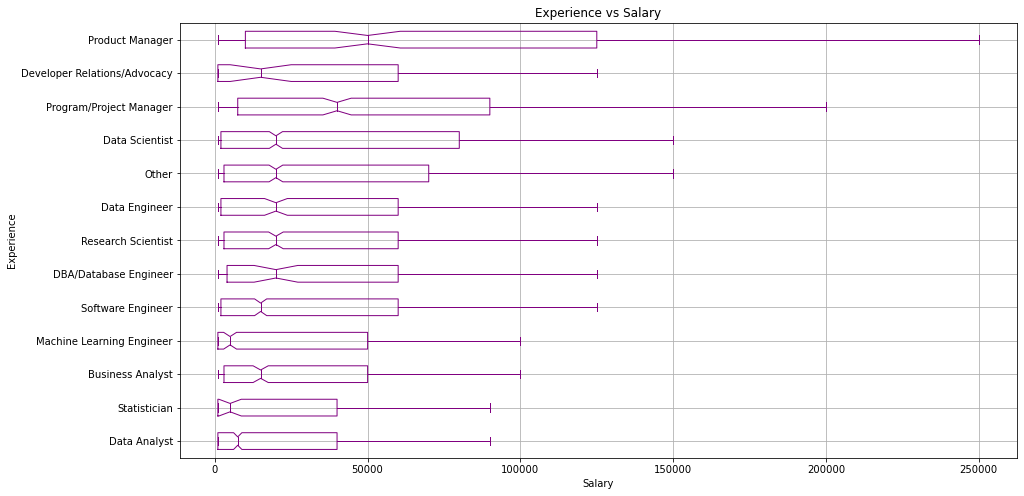

In [113]:
temp = pd.DataFrame({col: vals['Q25'] for col, vals in clean_kd.groupby(by='Q5')})
indx = temp.mean().sort_values()
temp[indx.index].boxplot(vert=False, return_type='axes', notch=True, showfliers=False, color='purple', grid=True, figsize=(15, 8))
plt.title("Experience vs Salary")
plt.ylabel('Experience')
plt.xlabel('Salary')
plt.show()

In [114]:
clean_kd[['Q5', 'Q25']].groupby('Q5').describe().sort_values(by=("Q25","mean"), ascending=False)

Q25                                       \
                               count          mean            std     min   
Q5                                                                          
Product Manager                285.0  90877.192982  143369.772112  1000.0   
Developer Relations/Advocacy    86.0  72656.976744  171850.127276  1000.0   
Program/Project Manager        784.0  65728.954082  102745.212731  1000.0   
Data Scientist                3240.0  57771.296296  106170.740600  1000.0   
Other                         2204.0  56941.923775  115403.732022  1000.0   
Data Engineer                  597.0  49226.968174   87071.250580  1000.0   
Research Scientist            1404.0  47183.048433   80804.503293  1000.0   
DBA/Database Engineer          151.0  46023.178808   59467.227326  1000.0   
Software Engineer             2110.0  45505.450237  101319.783478  1000.0   
Machine Learning Engineer     1327.0  42787.490580  101921.189100  1000.0   
Business Analyst               885.0  39983.050847   79124.960207  1000.0   
Statistician                   279.0  35992.831541   78035.974126  1000.0   
Data Analyst                  2039.0  28827.856793   56755.093315  1000.0   

                                                                     
                                  25%      50%       75%        max  
Q5                                                                   
Product Manager               10000.0  50000.0  125000.0  1000000.0  
Developer Relations/Advocacy   1000.0  15000.0   60000.0  1000000.0  
Program/Project Manager        7500.0  40000.0   90000.0  1000000.0  
Data Scientist                 2000.0  20000.0   80000.0  1000000.0  
Other                          3000.0  20000.0   70000.0  1000000.0  
Data Engineer                  2000.0  20000.0   60000.0  1000000.0  
Research Scientist             3000.0  20000.0   60000.0  1000000.0  
DBA/Database Engineer          4000.0  20000.0   60000.0   250000.0  
Software Engineer              2000.0  15000.0   60000.0  1000000.0  
Machine Learning Engineer      1000.0   5000.0   50000.0  1000000.0  
Business Analyst               3000.0  15000.0   50000.0  1000000.0  
Statistician                   1000.0   5000.0   40000.0  1000000.0  
Data Analyst                   1000.0   7500.0   40000.0  1000000.0

### 2. [4pts] Estimating the difference between average salary (Q25) of men vs. women (Q2). 

#### 2a) [0.5pts] Compute and report descriptive statistics for each group (remove missing data, if necessary). 


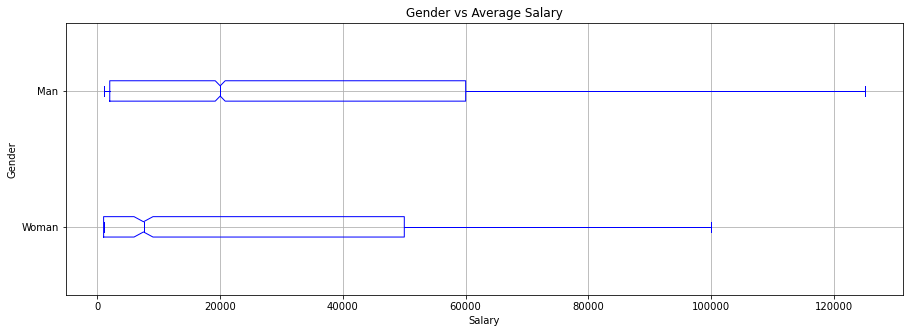

In [115]:
temp = pd.DataFrame({col: vals['Q25'] for col, vals in clean_kd.groupby(by='Q2')})
man_woman_df = temp[['Man', 'Woman']]
indx = man_woman_df.mean().sort_values()
man_woman_df[indx.index].boxplot(vert=False, return_type='axes', notch=True, showfliers=False, color='blue', grid=True, figsize=(15, 5))
plt.title("Gender vs Average Salary")
plt.ylabel('Gender')
plt.xlabel('Salary')

man_df = man_woman_df['Man'].dropna()
woman_df = man_woman_df['Woman'].dropna()

In [116]:
print("Man Salary (Biased Estimator): Mean = %g, st. dev = %g" % (np.mean(man_df), np.std(man_df)))
print("Woman Salary (Biased Estimator): Mean = %g, st. dev = %g" % (np.mean(woman_df), np.std(woman_df)))

Man Salary (Biased Estimator): Mean = 51193.6, st. dev = 99975.3
Woman Salary (Biased Estimator): Mean = 34816.9, st. dev = 72002.8


In [117]:
pd_man_woman = pd.DataFrame({"Man": man_df.describe(), "Woman": woman_df.describe()})
pd_man_woman.index.name = 'Unbiased Estimator Statistics'
pd_man_woman


,Man,Woman
Unbiased Estimator Statistics,,
count,12642.000000,2482.000000
mean,51193.600696,34816.881547
std,99979.274378,72017.347888
min,1000.000000,1000.000000
25%,2000.000000,1000.000000
50%,20000.000000,7500.000000
75%,60000.000000,50000.000000
max,1000000.000000,1000000.000000


#### 2b) [0.5pts]  If  suitable,  perform  a  two-sample  t-test  with  a  0.05  threshold.  Explain  your rationale. 

- One of the assumptions for a T-test is that the data should be normally distributed. A quick check can be conducted through a QQ plot. If the data is normally distributed we should see an ~ straight line

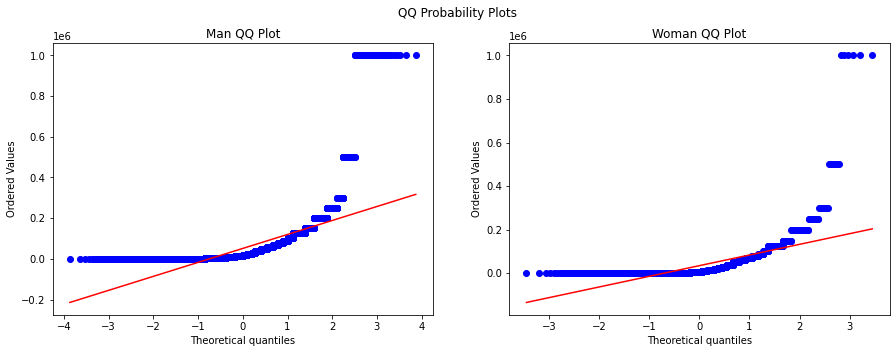

In [118]:
figure = plt.figure(figsize=(15, 5))
ax1 = figure.add_subplot(121)
ax1 = probplot(man_df, plot=plt)
plt.title("Man QQ Plot")
ax2 = figure.add_subplot(122)
ax2 = probplot(woman_df, plot=plt)
plt.title("Woman QQ Plot")
figure.suptitle("QQ Probability Plots")
plt.show()

In [119]:
print(pg.normality(man_df))
print(pg.normality(woman_df))

            W  pval  normal
Man  0.471423   0.0   False
              W  pval  normal
Woman  0.462199   0.0   False


In [120]:
tc, pc = stats.bartlett(man_df, woman_df)
print("Bartlett-test: t = %g  p = %g" % (tc, pc))


Bartlett-test: t = 384.314  p = 1.43147e-85


- From the QQ plot above we can see that man_df and woman_df are not normally distibuted. Moreover, to check if the variances are similar we can conduct a Bartlett test. The P-Value was << 0.05 indicating a rejecttion of the null hypothesis and conclude that the variances are significantly different. Since the varaince for both the man_df and woman_df are different, and the t-test cannot be performed. An alternative test would be the Welch's Test which accounts for the difference in variance, however even this test is unrelaible as the sample sizes for each group are dramatically different (Men = 12642, Woman = 2482). 

#### 2c) [1.5pts] Bootstrap your data for comparing the mean of salary (Q25) for the two groups. 
*Note  that the  number  of instances  you  sample  from  each  group  should  be  relative  to its size. Use 1000 replications. Plot two bootstrapped distributions (for men and women) and the distribution of the difference in means.* 


In [121]:
def bootstrapping(df):
    boot_mean = []
    boot_sample = 0
    np.random.seed(100)
    for i in range(1000):
        boot_sample = np.random.choice(df, size=int(0.4 * len(df))) # sample size of 40% of data
        boot_mean.append(np.mean(boot_sample))    
    return boot_mean

In [122]:
man_boot = bootstrapping(man_df)

print("Man Salary: Mean = %g, st. dev = %g" % (np.mean(man_df), np.std(man_df, ddof=1)))
print("Man Salary (Bootstrapped): Mean = %g, Std = %g" % (np.mean(man_boot), np.std(man_boot, ddof=1)))


Man Salary: Mean = 51193.6, st. dev = 99979.3
Man Salary (Bootstrapped): Mean = 51263.7, Std = 1366.82


In [123]:
woman_boot = bootstrapping(woman_df)

print("Woman Salary: Mean = %g, st. dev = %g" % (np.mean(woman_df), np.std(woman_df, ddof=1)))
print("Woman Salary (Bootstrapped): Mean = %g, Std = %g" % (np.mean(woman_boot), np.std(woman_boot, ddof=1)))


Woman Salary: Mean = 34816.9, st. dev = 72017.3
Woman Salary (Bootstrapped): Mean = 34782.9, Std = 2369.71


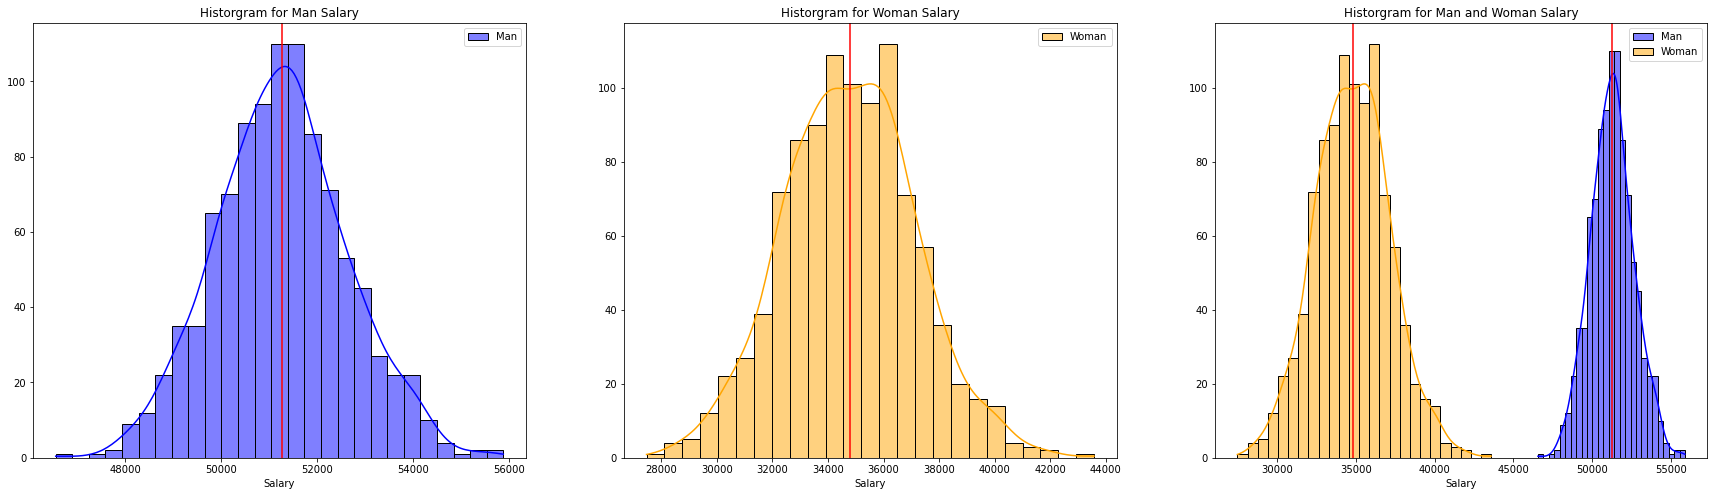

In [124]:
figure = plt.figure(figsize=(30, 8))

ax1 = figure.add_subplot(131)
ax1 = sns.histplot(man_boot, label="Man", kde=True, color='blue')
plt.axvline(np.mean(man_boot), color='red')
plt.title("Historgram for Man Salary")
plt.xlabel('Salary')
plt.ylabel("")
plt.legend()

ax2 = figure.add_subplot(132)
ax2 = sns.histplot(woman_boot, label="Woman", kde=True, color='orange')
plt.axvline(np.mean(woman_boot), color='red')
plt.title("Historgram for Woman Salary")
plt.xlabel('Salary')
plt.ylabel("")
plt.legend()

ax3 = figure.add_subplot(133)
ax3 = sns.histplot(man_boot, label="Man", kde=True, color='blue')
ax3 = sns.histplot(woman_boot, label="Woman", kde=True, color='orange')
plt.axvline(np.mean(man_boot), color='red')
plt.axvline(np.mean(woman_boot), color='red')
plt.title("Historgram for Man and Woman Salary")
plt.xlabel('Salary')
plt.ylabel("")
plt.legend()
plt.show()


Difference in means: Mean = 16480.8, st. dev = 2760.11


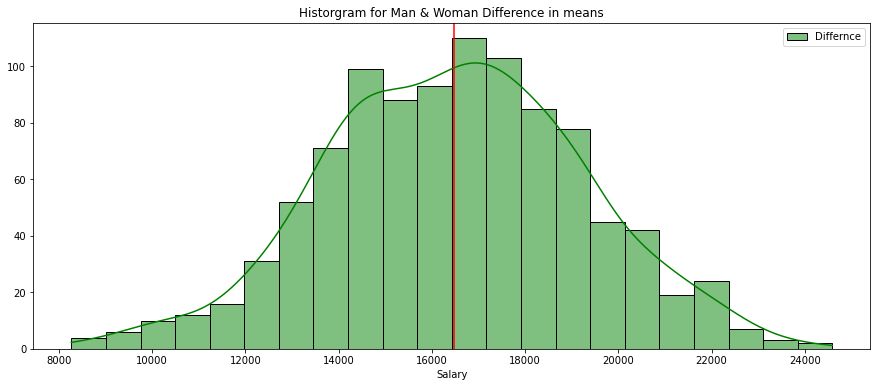

In [125]:
man_woman_diff = np.array(man_boot) - np.array(woman_boot)
print("Difference in means: Mean = %g, st. dev = %g" % (np.mean(man_woman_diff), np.std(man_woman_diff)))

plt.figure(figsize=(15, 6))
sns.histplot(man_woman_diff, label="Differnce", kde=True, color='green')
plt.axvline(np.mean(man_woman_diff), color='red')
plt.title("Historgram for Man & Woman Difference in means")
plt.xlabel('Salary')
plt.ylabel("")
plt.legend()
plt.show()


In [127]:
pd_boot_g = pd.DataFrame({"Man Boot": man_boot,"Woman Boot": woman_boot})
pd_boot_g.describe()


,Man Boot,Woman Boot
count,1000.000000,1000.000000
mean,51263.691752,34782.856351
std,1366.817232,2369.705778
min,46553.500791,27465.221774
25%,50342.019383,33099.294355
50%,51270.272943,34822.832661
75%,52114.492682,36338.961694
max,55887.361551,43580.141129


#### 2d) [0.5pts] If suitable, perform a two-sample t-test with a 0.05 threshold on the bootstrapped data. Explain your rationale. 

- Using the logic mention in 2b), we can first check if the data is normally distributed through a QQ plot.

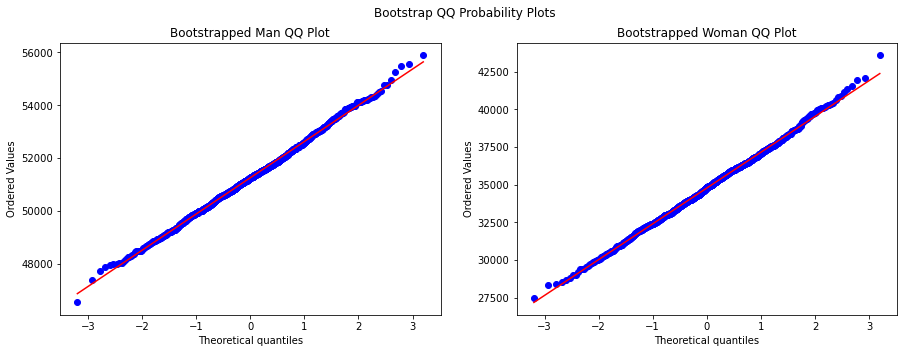

In [128]:
figure = plt.figure(figsize=(15, 5))
ax1 = figure.add_subplot(121)
ax1 = probplot(man_boot, plot=plt)
plt.title("Bootstrapped Man QQ Plot")

ax2 = figure.add_subplot(122)
ax2 = probplot(woman_boot, plot=plt)
plt.title("Bootstrapped Woman QQ Plot")

figure.suptitle("Bootstrap QQ Probability Plots")
plt.show()

In [129]:
print(pg.normality(man_boot))
print(pg.normality(woman_boot))

          W      pval  normal
0  0.998455  0.525739    True
          W      pval  normal
0  0.998648  0.653765    True


- As we can see, the means of the bootstrapped data is ~ normally distributed (we also saw this in the histograms).

In [130]:
tc, pc = stats.bartlett(man_boot, woman_boot)
print("Bartlett-test: t = %g  p = %g" % (tc, pc))

Bartlett-test: t = 288.225  p = 1.21168e-64



- Since the man and woman bootstrap data have different variances, we cannot do a t-test as the homoscedasticity assumption in variance is false but since the bootstrapped data is normal and equal sample size we can compute the Welch's test

In [131]:
tc, pc = stats.ttest_ind(man_boot, woman_boot, equal_var=False)
print("Welch's-test: t = %g  p = %g" % (tc, pc))

Welch's-test: t = 190.511  p = 0


- The p-value = 0 indicated that there is a notable difference between the datasets and this does not occur by chance.

#### 2e) [1pts] Comment on your findings. 

Overall, we saw that in terms of salary, men and women have a notable difference. We demonstrated this result in several ways:

1. In 2a), when looking at the basic statistics of the `man/woman_df`, the mean for men's salaries (51193.6) was higher than the women's average salary (34816.9).
2. In 2b), although we did not have the appropriate criteria to conduct a t-test, the Welch's test produced a p-value << 0.05, which indicated that the null hypothesis can be rejected.
3. In 2c), by taking the mean of the bootstrapped data for 1000 repetitions, we were able to normalize the data. From here, by plotting the histograms and seeing the distributions for both men's and women's salaries, men had a higher salary on average.
4. In 2d), by taking the Welch's test, the produced p-value was 0, thus indicating that the rejection of the null hypothesis did not occur by chance.

It is clear that there is a difference between the salaries of men and women, however, further analysis can be conducted accounting for the other options for gender identification in the survey that could possibly bring insight to correlations in the data.

### 3. [5pts] Select “highest level of formal education” (Q4) from the dataset and repeat steps a to e, 
*This time  use  analysis  of  variance  (ANOVA)  instead  of  t-test  for  hypothesis  testing  to  compare  the  means  of salary for three groups  (Bachelor’s  degree,  Master’s  degree,  and Doctoral degree) [0.75pts for a; 0.5 pts for b; 2pts for c; 0.75 pts for d; 1pt for e].*

#### 3a)

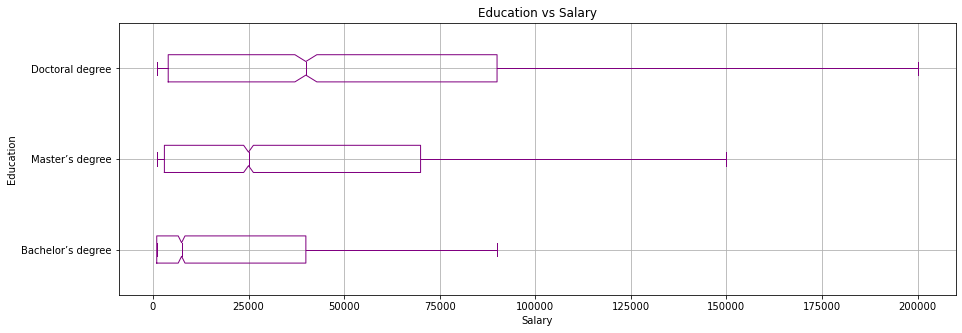

In [132]:
temp = pd.DataFrame({col: vals['Q25']for col, vals in clean_kd.groupby(by='Q4')})
edu_df = temp[['Bachelor’s degree', 'Master’s degree', 'Doctoral degree']]
indx = edu_df.mean().sort_values()
edu_df[indx.index].boxplot(vert=False, return_type='axes', notch=True, showfliers=False, color='purple', grid=True, figsize=(15, 5))
plt.title("Education vs Salary")
plt.ylabel('Education')
plt.xlabel('Salary')
plt.show()

bachelor_df = edu_df['Bachelor’s degree'].dropna()
master_df = edu_df['Master’s degree'].dropna()
doctor_df = edu_df['Doctoral degree'].dropna()


In [133]:
print("Bachelor's Salary (Biased Estimator): Mean = %g, st. dev = %g" % (np.mean(bachelor_df), np.std(bachelor_df)))
print("Master's Salary (Biased Estimator): Mean = %g, st. dev = %g" % (np.mean(master_df), np.std(master_df)))
print("Doctoral Salary (Biased Estimator): Mean = %g, st. dev = %g" % (np.mean(doctor_df), np.std(doctor_df)))

Bachelor's Salary (Biased Estimator): Mean = 35578.3, st. dev = 89372.7
Master's Salary (Biased Estimator): Mean = 52706.9, st. dev = 90922.1
Doctoral Salary (Biased Estimator): Mean = 70641.2, st. dev = 117135


In [134]:
pd_edu = pd.DataFrame({"Bachelor": bachelor_df.describe(), "Master": master_df.describe(), "Doctor": doctor_df.describe()})
pd_edu.index.name = 'Unbiased Estimator Statistics'
pd_edu


,Bachelor,Master,Doctor
Unbiased Estimator Statistics,,,
count,4777.000000,6799.000000,2217.000000
mean,35578.291815,52706.868657,70641.181777
std,89382.060777,90928.786678,117160.947589
min,1000.000000,1000.000000,1000.000000
25%,1000.000000,3000.000000,4000.000000
50%,7500.000000,25000.000000,40000.000000
75%,40000.000000,70000.000000,90000.000000
max,1000000.000000,1000000.000000,1000000.000000


#### 3b)

- Once again we first check if the data is normally distributed through QQ plots.

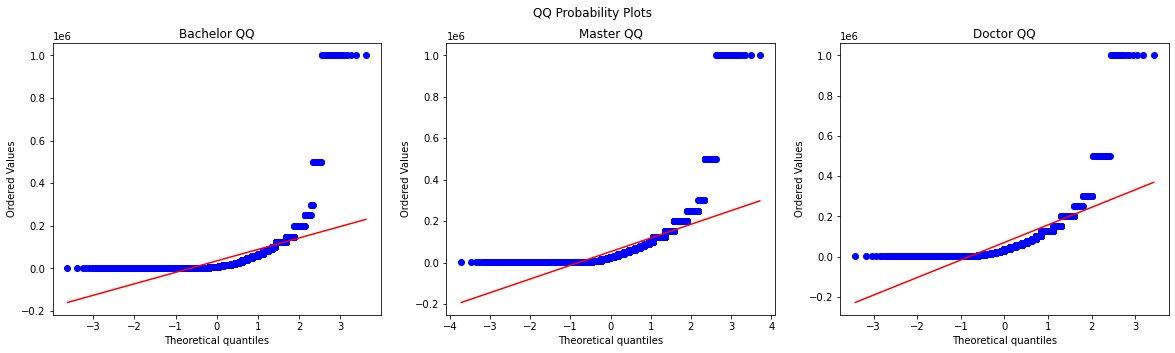

In [135]:
figure = plt.figure(figsize=(20, 5))
ax1 = figure.add_subplot(131)
ax1 = probplot(bachelor_df, plot=plt)
plt.title("Bachelor QQ")

ax2 = figure.add_subplot(132)
ax2 = probplot(master_df, plot=plt)
plt.title("Master QQ")

ax3 = figure.add_subplot(133)
ax3 = probplot(doctor_df, plot=plt)
plt.title("Doctor QQ")

figure.suptitle("QQ Probability Plots")
plt.show()

In [136]:
print(pg.normality(bachelor_df))
print(pg.normality(master_df))
print(pg.normality(doctor_df))

                          W  pval  normal
Bachelor’s degree  0.362125   0.0   False
                        W  pval  normal
Master’s degree  0.526678   0.0   False
                        W  pval  normal
Doctoral degree  0.553671   0.0   False


- As we can see, the data for each degree is not normally distributed, thus the ANOVA test cannot be performed. And similary to Q2, when looking at the variance/std for each degree, it is clear that the homoscedasticity assumption fails. Moreover, the sample sizes for each group are different,
    - Bachelor's sample size: 4777
    - Master's sample size: 6799
    - Doctor's sample size: 2217

In [137]:
t, p = stats.bartlett(bachelor_df, master_df, doctor_df)
print("t = %g, p = %g"%(t,p)) # p<<0.05 indicates signigicant difference in variance

t = 284.538, p = 1.63479e-62


- The difference between the masters and doctors sample size, can be factored into the confidence of any metric test. The ANOVA test is not a reliable metric in this case, even the Welch ANOVA test is not reliable due to non-normality and difference in sample size.

#### 3c)

In [138]:
def bootstrapping(df):
    boot_mean = []
    boot_sample = 0
    np.random.seed(100)
    for i in range(1000):
        boot_sample = np.random.choice(df, size=int(0.3 * len(df))) # sample size of 30% of data
        boot_mean.append(np.mean(boot_sample))    
    return boot_mean

- Unbiased Estimators

In [139]:
bachelor_boot = bootstrapping(bachelor_df)
print("Bachelor Salary: Mean = %g, st. dev = %g" % (np.mean(bachelor_df), np.std(bachelor_df, ddof=1)))
print("Bachelor Salary (Bootstrapped): Mean = %g, Std = %g" % (np.mean(bachelor_boot), np.std(bachelor_boot, ddof=1)))

Bachelor Salary: Mean = 35578.3, st. dev = 89382.1
Bachelor Salary (Bootstrapped): Mean = 35527.4, Std = 2350.43


In [140]:
master_boot = bootstrapping(master_df)
print("Master's Salary: Mean = %g, st. dev = %g" %(np.mean(master_df), np.std(master_df, ddof=1)))
print("Master's Salary (Bootstrapped): Mean = %g, Std = %g" % (np.mean(master_boot), np.std(master_boot, ddof=1)))

Master's Salary: Mean = 52706.9, st. dev = 90928.8
Master's Salary (Bootstrapped): Mean = 52773.3, Std = 1902.11


In [141]:
doctor_boot = bootstrapping(doctor_df)
print("Doctoral's Salary: Mean = %g, st. dev = %g" % (np.mean(doctor_df), np.std(doctor_df, ddof=1)))
print("Doctoral's Salary (Bootstrapped): Mean = %g, Std = %g" % (np.mean(doctor_boot), np.std(doctor_boot, ddof=1)))

Doctoral's Salary: Mean = 70641.2, st. dev = 117161
Doctoral's Salary (Bootstrapped): Mean = 70853, Std = 4432.23


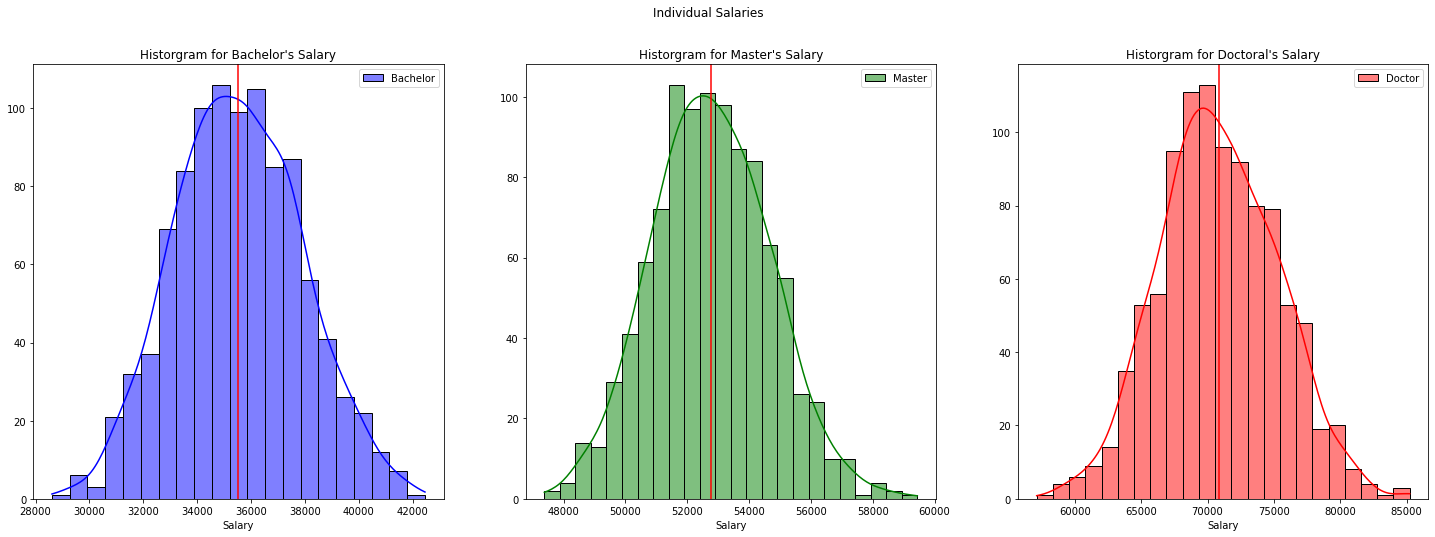

In [142]:
figure = plt.figure(figsize=(25, 8))

ax1 = figure.add_subplot(131)
ax1 = sns.histplot(bachelor_boot, label="Bachelor", kde=True, color='blue')
plt.axvline(np.mean(bachelor_boot), color='red')
plt.title("Historgram for Bachelor's Salary")
plt.xlabel('Salary')
plt.ylabel("")
plt.legend()

ax2 = figure.add_subplot(132)
ax2 = sns.histplot(master_boot, label="Master", kde=True, color='green')
plt.axvline(np.mean(master_boot), color='red')
plt.title("Historgram for Master's Salary")
plt.xlabel('Salary')
plt.ylabel("")
plt.legend()

ax3 = figure.add_subplot(133)
ax3 = sns.histplot(doctor_boot, label="Doctor", kde=True, color='red')
plt.axvline(np.mean(doctor_boot), color='red')
plt.title("Historgram for Doctoral's Salary")
plt.xlabel('Salary')
plt.ylabel("")
plt.legend()

figure.suptitle("Individual Salaries")
plt.show()



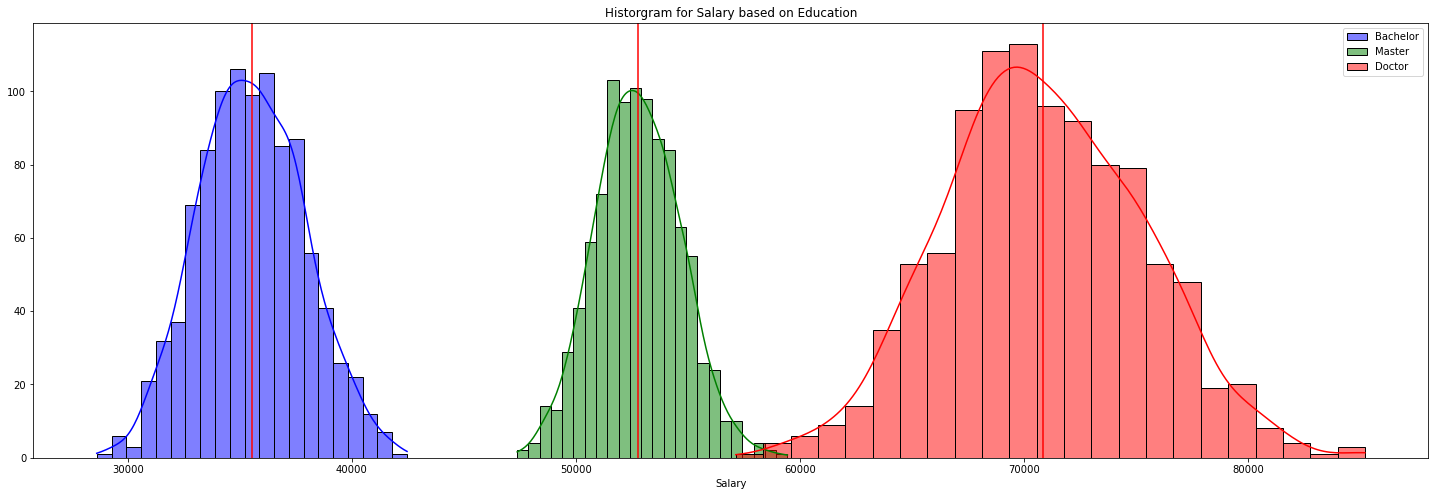

In [143]:
plt.figure(figsize=(25, 8))
sns.histplot(bachelor_boot, label="Bachelor", kde=True, color='blue')
sns.histplot(master_boot, label="Master", kde=True, color='green')
sns.histplot(doctor_boot, label="Doctor", kde=True, color='red')
plt.axvline(np.mean(bachelor_boot), color='red')
plt.axvline(np.mean(master_boot), color='red')
plt.axvline(np.mean(doctor_boot), color='red')
plt.title("Historgram for Salary based on Education")
plt.xlabel('Salary')
plt.ylabel("")
plt.legend()
plt.show()


Bachelor & Master Difference in means: Mean = 17245.9, st. dev = 2955.96
Master & Doctor Difference in means: Mean = 18079.7, st. dev = 4855.29
Bachelor & Doctor Difference in means: Mean = 35325.6, st. dev = 5063.81
Total Difference in means: Mean = 70651.1, st. dev = 10127.6


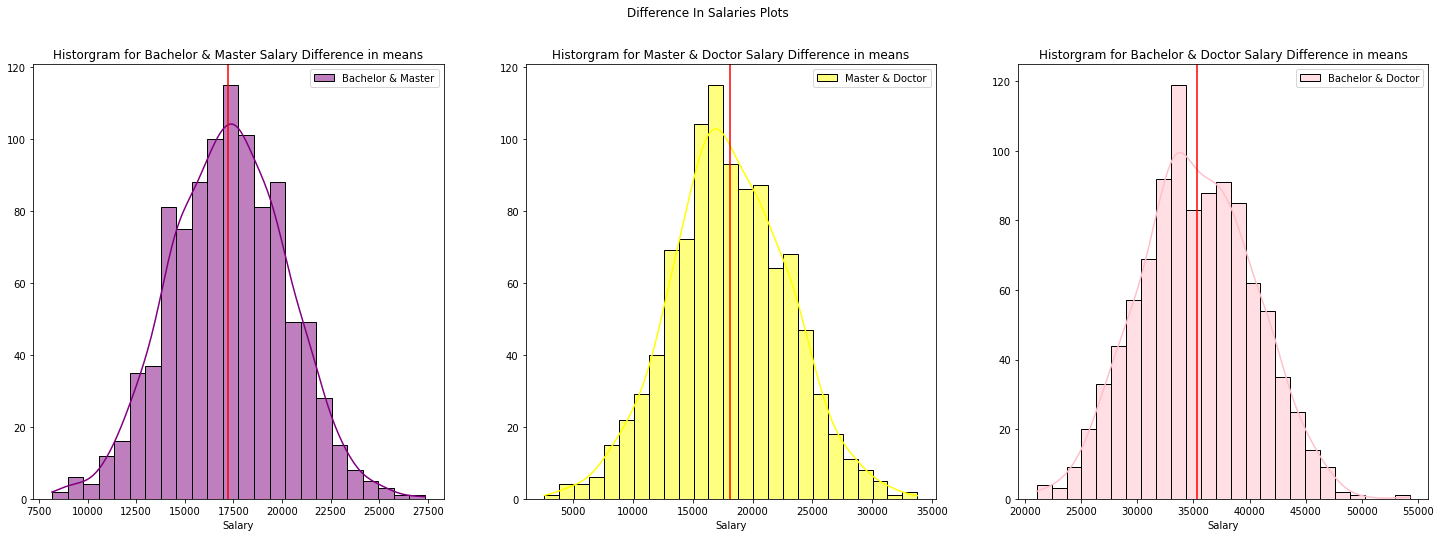

In [144]:
bb_arr = np.array(bachelor_boot)
mb_arr = np.array(master_boot)
db_arr = np.array(doctor_boot)


Bach_Master_diff = np.abs(bb_arr - mb_arr)
Bach_Doc_diff = np.abs(bb_arr - db_arr)
Master_Doc_diff = np.abs(db_arr - mb_arr)

All_diff = []
for i in range(len(bb_arr)):
    All_diff.append(abs(bb_arr[i] - mb_arr[i]) + abs(mb_arr[i] - db_arr[i]) + abs(db_arr[i] - bb_arr[i]))
    

print("Bachelor & Master Difference in means: Mean = %g, st. dev = %g" % (np.mean(Bach_Master_diff), np.std(Bach_Master_diff)))
print("Master & Doctor Difference in means: Mean = %g, st. dev = %g" % (np.mean(Master_Doc_diff), np.std(Master_Doc_diff)))
print("Bachelor & Doctor Difference in means: Mean = %g, st. dev = %g" % (np.mean(Bach_Doc_diff), np.std(Bach_Doc_diff)))
print("Total Difference in means: Mean = %g, st. dev = %g" % (np.mean(All_diff), np.std(All_diff)))


figure = plt.figure(figsize=(25, 8))

ax1 = figure.add_subplot(131)
ax1 = sns.histplot(Bach_Master_diff, label="Bachelor & Master", kde=True, color='purple')
plt.axvline(np.mean(Bach_Master_diff), color='red')
plt.title("Historgram for Bachelor & Master Salary Difference in means")
plt.xlabel('Salary')
plt.ylabel("")
plt.legend()

ax2 = figure.add_subplot(132)
ax2 = sns.histplot(Master_Doc_diff, label="Master & Doctor", kde=True, color='yellow')
plt.axvline(np.mean(Master_Doc_diff), color='red')
plt.title("Historgram for Master & Doctor Salary Difference in means")
plt.xlabel('Salary')
plt.ylabel("")
plt.legend()


ax3 = figure.add_subplot(133)
ax3 = sns.histplot(Bach_Doc_diff, label="Bachelor & Doctor", kde=True, color='pink')
plt.axvline(np.mean(Bach_Doc_diff), color='red')
plt.title("Historgram for Bachelor & Doctor Salary Difference in means")
plt.xlabel('Salary')
plt.ylabel("")
plt.legend()

figure.suptitle("Difference In Salaries Plots")
plt.show()


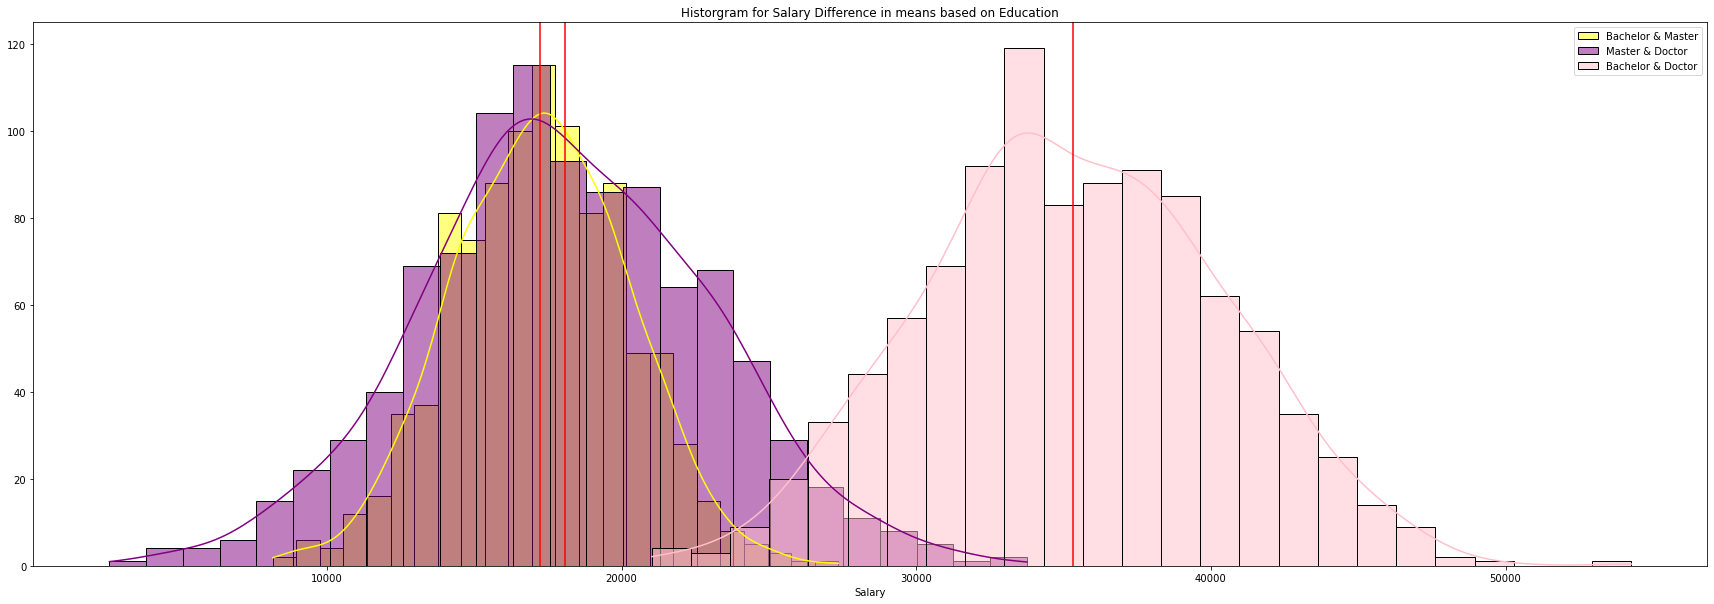

In [145]:
plt.figure(figsize=(30,10))
sns.histplot(Bach_Master_diff, label="Bachelor & Master", kde=True, color='yellow')
plt.axvline(np.mean(Bach_Master_diff), color='red')
plt.xlabel('Salary')
plt.ylabel("")
plt.legend()

sns.histplot(Master_Doc_diff, label="Master & Doctor", kde=True, color='purple')
plt.axvline(np.mean(Master_Doc_diff), color='red')
plt.xlabel('Salary')
plt.ylabel("")
plt.legend()


sns.histplot(Bach_Doc_diff, label="Bachelor & Doctor", kde=True, color='pink')
plt.axvline(np.mean(Bach_Doc_diff), color='red')
plt.title("Historgram for Salary Difference in means based on Education")
plt.xlabel('Salary')
plt.ylabel("")
plt.legend()

plt.show()


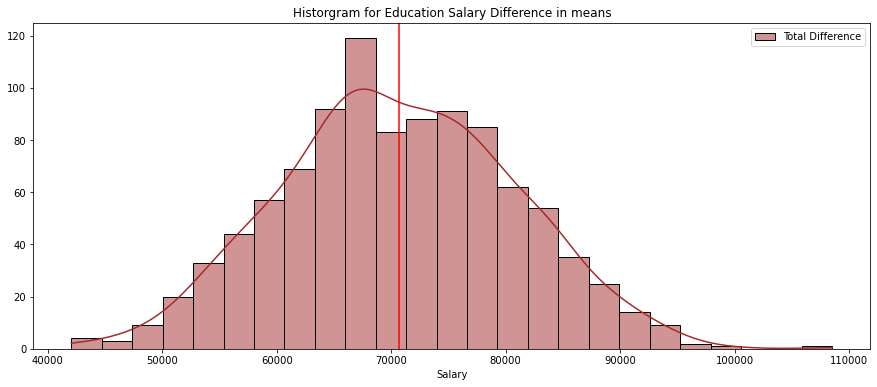

In [146]:
plt.figure(figsize=(15, 6))
sns.histplot(All_diff, label="Total Difference", kde=True, color='brown')
plt.axvline(np.mean(All_diff), color='red')
plt.title("Historgram for Education Salary Difference in means")
plt.xlabel('Salary')
plt.ylabel("")
plt.legend()

In [147]:
pd_boot_edu = pd.DataFrame({"Bachelor Boot": bachelor_boot,"Master Boot": master_boot, "Doctor Boot": doctor_boot})
pd_boot_edu.describe()


,Bachelor Boot,Master Boot,Doctor Boot
count,1000.000000,1000.000000,1000.000000
mean,35527.398465,52773.281265,70852.951128
std,2350.425339,1902.106211,4432.230005
min,28607.466853,47376.164787,57136.842105
25%,33833.653175,51489.700834,67833.270677
50%,35503.314724,52729.892104,70586.842105
75%,37189.811584,54050.085826,73965.977444
max,42459.874389,59438.450221,85218.045113


#### 3d)

- Check for normality in the bootstrapped data

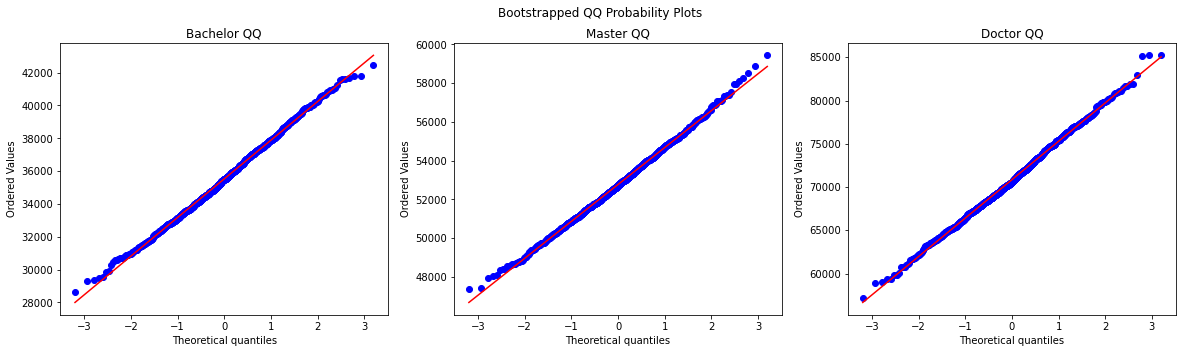

In [148]:
figure = plt.figure(figsize=(20,5))
ax1 = figure.add_subplot(131)
ax1 = probplot(bachelor_boot, plot=plt)
plt.title("Bachelor QQ")

ax2 = figure.add_subplot(132)
ax2 = probplot(master_boot, plot=plt)
plt.title("Master QQ")

ax3 = figure.add_subplot(133)
ax3 = probplot(doctor_boot, plot=plt)
plt.title("Doctor QQ")

figure.suptitle("Bootstrapped QQ Probability Plots")
plt.show()


In [149]:
print(pg.normality(bachelor_boot))
print(pg.normality(master_boot))
print(pg.normality(doctor_boot))


          W      pval  normal
0  0.997792  0.205949    True
          W      pval  normal
0  0.998359  0.466177    True
          W      pval  normal
0  0.998145  0.348681    True


- We can see that the bootstrapped data is normalized. Next we can check the if the how the variance difference between all the groups through the Bartlett test.

In [150]:
b, p = stats.bartlett(bachelor_boot, master_boot, doctor_boot)
print("Bartlett Test: b = %g  p = %g" % (b, p))# p<<0.05 indicates signigicant difference in variance

Bartlett Test: b = 809.859  p = 1.38447e-176


- We can see that the p-value is much less that 0.05 thus the ANOVA test fails -> Welch's ANOVA Test.

In [151]:
edu_boot_df = pd.DataFrame({"bach": bachelor_boot, "mast": master_boot, "doc": doctor_boot})
combined_boot_edu = edu_boot_df.melt(var_name='edu', value_name='value')
pg.welch_anova(data=combined_boot_edu, dv='value', between='edu')

,Source,ddof1,ddof2,F,p-unc,np2
0,edu,2,1859.679498,30460.263934,0.0,0.955948


Welch's ANOVA Test
- F-value = 30460
- P-value = 0.0

The p-value = 0 indicates that we can reject the null hypothesis with full confidence such that there is a significant difference in the means of the 3 groups

#### 3e)

Overall, we saw that the salaries have notable difference based on the education of the candidate. We demonstrated this result in several ways:

1. In 3a), when looking at the basic statistics of the `bachelor/master/doctor_df`, the means for each degree was
    - bachelor salary mean = 35578
    - Masters salary mean = 52706
    - Doctor salary mean = 70641
2. In 3c), by taking the mean of the bootstrapped data for 1000 repetitions, we were able to normalize the data and perform further analysis by fufilling assumptions required for certain tests. From here, by plotting the histograms and seeing the distributions for all, we saw that the doctor degree had much higher salary than the rest.
3. In 3d), by taking the Welch's ANOVA test, the produced p-value was 0, thus indicating that the rejection of the null hypothesis did not occur by chance and there is a significant different in the means of the 3 groups.

It is clear that there is a difference in salaries based on education levels. Moreover, non-degree and bootcamp candidates could have produced interesting results.

In [152]:
%%shell

jupyter nbconvert --to html /content/MIE_1624_A1_William_Hazen.ipynb  

UsageError: Cell magic `%%shell` not found.
